###### Auto MPG Data Set

This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University. The dataset was used in the 1983 American Statistical Association Exposition.

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)

Attribute Information:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
autos = pd.read_csv('carmpg.csv')

In [3]:
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165,3693,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150,3436,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150,3433,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140,3449,10.5,70,1,"""ford torino"""


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [5]:
autos.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Our target is mpg and our aim is to predict mpg, hence we shall divide data into X and y

In [6]:
X = autos[['cylinders','displacement','weight','acceleration']]
y = autos['mpg']

In [7]:
X.head()

,cylinders,displacement,weight,acceleration
0,8,307.0,3504,12.0
1,8,350.0,3693,11.5
2,8,318.0,3436,11.0
3,8,304.0,3433,12.0
4,8,302.0,3449,10.5


In [8]:
y.head()

0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

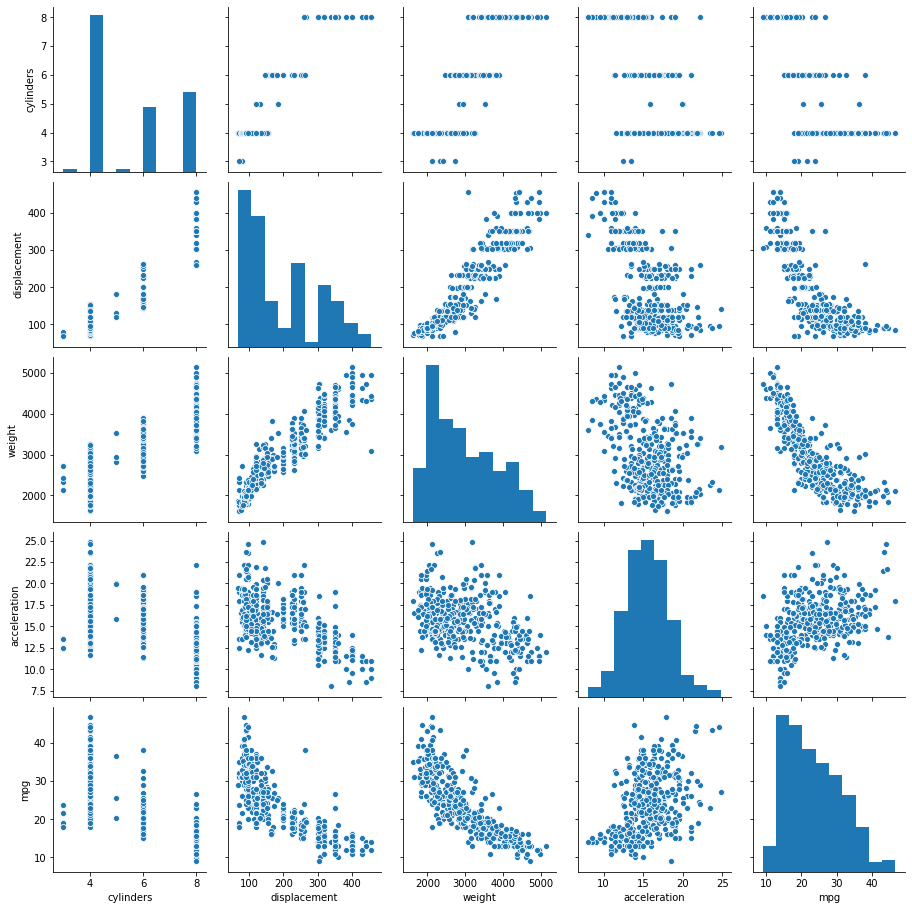

In [9]:
sns.pairplot(autos[['cylinders','displacement','weight','acceleration','mpg']])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state = 0)

In [12]:
X_train.shape
X_test.shape
y_train.shape
y_test.shape

(100,)

We will use the following models to train our data and then we will determine the best performing model and also we will save each model for future use and deploy as flask object

Linear Regression
Lasso Regression
Logistic regression
support vector meschanics
multivariate regression 
multiple regression
Stepwise Regression
Ridge Regression
ElasticNet Regression
XGBoost
RandomForest
KNN


In [13]:
from sklearn.linear_model import LinearRegression, LogisticRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [14]:
import joblib
import pickle

In [15]:
models = {'linreg':LinearRegression(), 'lasso':Lasso(),
         'ridge':Ridge(), 'elas': ElasticNet(), 'RFC':RandomForestRegressor(),
         'knn':KNeighborsRegressor()}

for each in models:
    model = models[each]
    model.fit(X_train, y_train)
    ypred = model.predict(X_test)
    print(f"for model: {each}")
    print("mean absolute error: ", mean_absolute_error(y_test,ypred))
    print("mean squared error: ", mean_squared_error(y_test, ypred))
    print("root mean squared error: ", np.sqrt(mean_squared_error(y_test, ypred)))
    print("r2 score: ", r2_score(y_test, ypred))
    
    with open('model_'+each, 'wb') as f:
        pickle.dump(model, f)
    print("\n\n\n")

for model: linreg
mean absolute error:  3.535432627072999
mean squared error:  19.508135714350395
root mean squared error:  4.416801525351846
r2 score:  0.6877163099083445




for model: lasso
mean absolute error:  3.4225335625196216
mean squared error:  18.002235096517982
root mean squared error:  4.2429040875935415
r2 score:  0.7118225704313362




for model: ridge
mean absolute error:  3.5353490099591465
mean squared error:  19.5060807254952
root mean squared error:  4.416568886080596
r2 score:  0.687749205901698




for model: elas
mean absolute error:  3.4660330363868774
mean squared error:  18.505637209270247
root mean squared error:  4.301817895874981
r2 score:  0.703764175120165




for model: RFC
mean absolute error:  2.9480150000000016
mean squared error:  17.640232482499997
root mean squared error:  4.200027676396906
r2 score:  0.7176174610238393




for model: knn
mean absolute error:  3.3284
mean squared error:  20.197176000000002
root mean squared error:  4.49412683399122

As we can see both Random Forest and Lasso models perform well. and all models are saved in pickle objects.

We have generated 6 pickle files for 6 different models. so we are going to generate dummy data and test the prediction for all 6 models.

'cylinders','displacement','weight','acceleration'

In [21]:
lis = [6,200.0,2500,8.5]
dummy = np.array([lis])

In [22]:
dummy

array([[   6. ,  200. , 2500. ,    8.5]])

In [25]:
#Now predict using the created models. First load models one by one

with open('model_linreg', 'rb') as f:
    model_linreg = pickle.load(f)

mpg = model_linreg.predict(dummy)
print("predicted mpg using linreg is: ", mpg)

predicted mpg using linreg is:  [23.74184526]


In [26]:
with open('model_ridge', 'rb') as f:
    model_ridge = pickle.load(f)

mpg = model_ridge.predict(dummy)
print("predicted mpg using ridge is: ", mpg)

predicted mpg using ridge is:  [23.7442349]


In [27]:
with open('model_RFC', 'rb') as f:
    model_RFC = pickle.load(f)

mpg = model_RFC.predict(dummy)
print("predicted mpg using RFC is: ", mpg)

predicted mpg using RFC is:  [23.032]


In [28]:
with open('model_lasso', 'rb') as f:
    model_lasso = pickle.load(f)

mpg = model_lasso.predict(dummy)
print("predicted mpg using lasso is: ", mpg)

predicted mpg using lasso is:  [25.08223453]


In [29]:
with open('model_knn', 'rb') as f:
    model_knn = pickle.load(f)

mpg = model_knn.predict(dummy)
print("predicted mpg using knn is: ", mpg)

predicted mpg using knn is:  [27.76]


In [30]:
with open('model_elas', 'rb') as f:
    model_elas = pickle.load(f)

mpg = model_elas.predict(dummy)
print("predicted mpg using elas is: ", mpg)

predicted mpg using elas is:  [24.6067768]


Now we will try to create a flask object to show our output on a website.

In [ ]:
Kindly refer to the created files: 

In [33]:
#import Flask
from flask import Flask

In [34]:
#We load the model.pkl file and initialize the flask app.

app = Flask(__name__)
mpg = pickle.load(open('model_linreg', 'rb'))

#Redirecting the API to the home page index.html

After initializing the app, we have to tell Flask what we want to do when the web page loads. The line @app.route("/", methods = ["GET","POST"]) tells Flask what to do when we load the home page of our website.


In [35]:
@app.route('/')
def home():
    return render_template('index.html')

Redirecting the API to predict the result (salary)

We use @app.route(‘/’) to define functions which are used to redirect them into any number of URI with respect to the API. So, when you start the flask server, it redirects to index.html file by default in our case.

In [36]:
@app.route('/predict', methods=['POST'])
def predict():
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)
    
    output = round(prediction[0],2)
    
    return render_template('index.html', prediction_text = 'mpg should be ${}'.format(output))

Since it is a ‘POST’ request, it will be reading the input values from request.form.values(). Now that we have the input values in the variable int_features, we will convert it into an array and then use the model to predict it and round the final prediction to two decimal places.

When we click on the predict button in index.html, it predicts the mpg for the values entered by the user (4 inputs), then passes on the variable ``` output ``` outputted from the model and sends it back to index.html template as prediction_text.